# How I approached the IMDB Sentiment Analysis Challenge
1. Setting up my environment
2. Data Exploration
3. Data Preprocessing
4. Model Setup and Training
5. Evaluating Results
6. Testing


# 1. Environment Set-Up

In [ ]:
#File Upload
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn tensorflow keras

In [ ]:
!pip install torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# 2. Data Exploration


In [ ]:
import pandas as pd
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Summary of the dataset
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
# Null Values
imdb_df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
imdb_df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# 3. Data Preprocessing

Many steps were taking in Data Preprocessing


---


1. Handling Duplicates: Duplicate reviews were removed to ensure cleaner data.
2. Numerical Encoding: Encoding sentiments to 1's and 0's
3. Text Cleaning: This involved many steps such as:

  *   Removed HTML tags, special characters, and stopwords
  *   Converted text to lowercase
  *   Used tokenization and padding

4. Splitting Data: 80% for training and 20% for testing




In [ ]:
# Check for duplicate rows
duplicate_rows = imdb_df[imdb_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 418


In [ ]:
imdb_df = imdb_df.drop_duplicates()
print(f"Number of rows after removing duplicates: {imdb_df.shape[0]}")

Number of rows after removing duplicates: 49582


In [ ]:
imdb_df = imdb_df.reset_index(drop=True)

In [ ]:
print(f"Final dataset shape: {imdb_df.shape}")
print(f"Remaining duplicate rows: {imdb_df.duplicated().sum()}")  # Should be 0


Final dataset shape: (49582, 2)
Remaining duplicate rows: 0


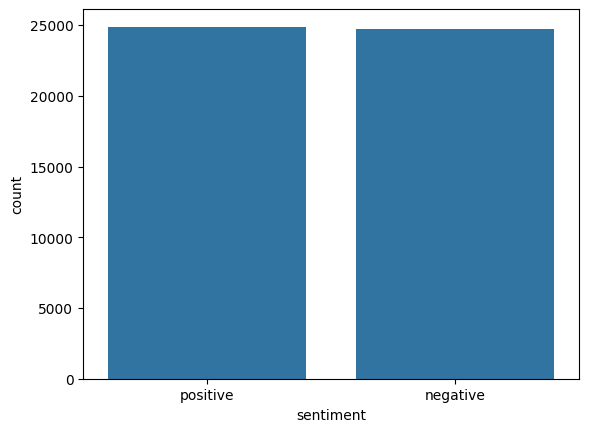

In [ ]:
#Visualize the data distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=imdb_df['sentiment'])
plt.show()

#### Convert labels to numerical format:

In [ ]:
imdb_df['sentiment'] = imdb_df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#text = re.sub('<[^<]+?>', '', text)
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

imdb_df['cleaned_review'] = imdb_df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for i in range(5):
    print("Cleaned Reviews: ", [i])
    print(imdb_df['cleaned_review'].iloc[i], "\n")
    print("Sentiment: ", imdb_df['sentiment'].iloc[i], "\n\n")

Cleaned Reviews:  [0]
one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches 

In [ ]:
#Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb_df['cleaned_review'])

sequences = tokenizer.texts_to_sequences(imdb_df['cleaned_review'])
padded_sequences = pad_sequences(sequences, maxlen=200)  # Standardizing length


### Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert to numpy arrays
X = np.array(padded_sequences)
y = np.array(imdb_df['sentiment'])

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (39665, 200), (39665,)
Testing data shape: (9917, 200), (9917,)


# 4. Model Training: Train a Deep Learning Model (LSTM)


---

 I chose Long Short-Term Memory (LSTM) networks because they are well-suited for sequential data like text. Unlike traditional neural networks, LSTMs can capture long-range dependencies, meaning they remember important context from earlier words in a sentence. This helps improve sentiment analysis, where the meaning of a phrase often depends on previous words.

 ### Model Architecture
 1. **Embedding layer:** converts words into numerical vector representations.
 2. **LSTM layers:** process text sequentially and retain important contextual information.
 3. **Dropout layers:** to prefent overfitting
 4. Dense Output Layer with Sigmoid Activation


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = 5000

model = Sequential([
    Embedding(vocab_size, 128, input_length=200),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


620/620 ━━━━━━━━━━━━━━━━━━━━ 496s 791ms/step - accuracy: 0.7687 - loss: 0.4676 - val_accuracy: 0.8766 - val_loss: 0.3009
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 502s 791ms/step - accuracy: 0.9001 - loss: 0.2564 - val_accuracy: 0.8865 - val_loss: 0.2777
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 494s 779ms/step - accuracy: 0.9079 - loss: 0.2388 - val_accuracy: 0.8766 - val_loss: 0.2951
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 505s 783ms/step - accuracy: 0.9321 - loss: 0.1810 - val_accuracy: 0.8777 - val_loss: 0.3127
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 499s 778ms/step - accuracy: 0.9475 - loss: 0.1464 - val_accuracy: 0.8717 - val_loss: 0.3476


In [ ]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,463,173 (9.40 MB)

 Trainable params: 821,057 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,642,116 (6.26 MB)

# 5. Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")

#predicted probabilities
y_pred_probs = model.predict(X_test)

#To binary class labels (0 or 1)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()


# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


310/310 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.8779 - loss: 0.3227
LSTM Model Accuracy: 87.17%
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4940
           1       0.84      0.92      0.88      4977

    accuracy                           0.87      9917
   macro avg       0.88      0.87      0.87      9917
weighted avg       0.88      0.87      0.87      9917



In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


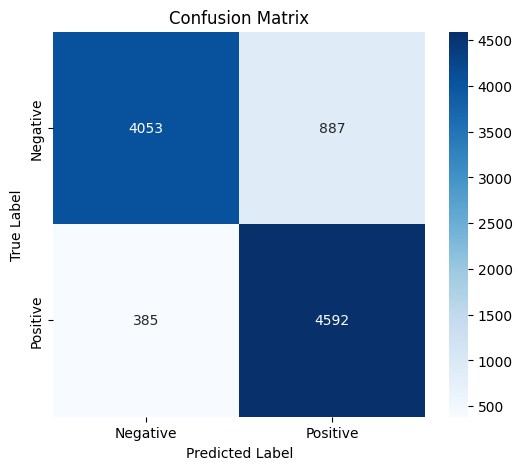

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


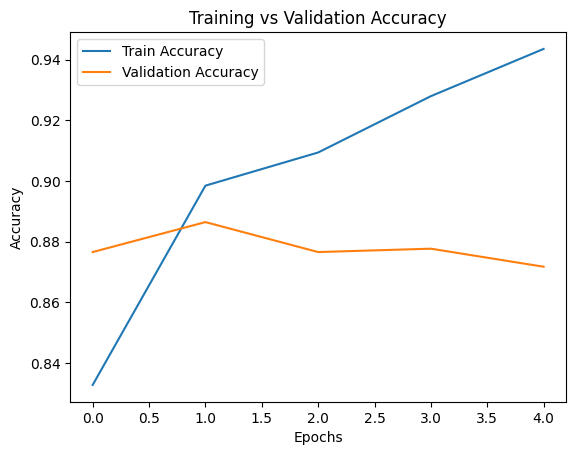

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


# 6. Testing

In [ ]:
def analyze_sentiment(text):

    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=200)

    # Get prediction
    probability = model.predict(padded)[0][0]

    # Determine sentiment
    return "Positive" if probability > 0.5 else "Negative"


In [ ]:
# Example usage
sample_review = "This movie was absolutely amazing. I enjoyed every moment!"
predicted_sentiment = analyze_sentiment(sample_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Sentiment: Positive
